In [1]:
# Python Libraries
%matplotlib inline
import pickle
import numpy as np
import pandas as pd
import matplotlib
from keras.datasets import cifar10
from keras import backend as K

# Custom Networks
from networks.resnet import ResNet

# Helper functions
from differential_evolution import differential_evolution
import helper
import attackHelper

matplotlib.style.use('ggplot')
np.random.seed(100)

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
resnet = ResNet()
models = [resnet]
network_stats, correct_imgs = helper.evaluate_models(models, x_test, y_test)
correct_imgs = pd.DataFrame(correct_imgs, columns=['name', 'img', 'label', 'confidence', 'pred'])
network_stats = pd.DataFrame(network_stats, columns=['name', 'accuracy', 'param_count'])

network_stats

Successfully loaded resnet
Evaluating  resnet ...


,name,accuracy,param_count
0,resnet,0.9173,470218



 resnet - image 6400 - 1 / 5


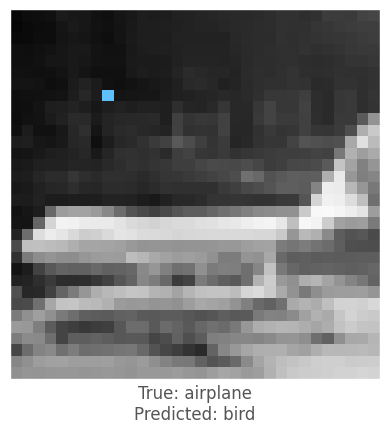


 resnet - image 7762 - 2 / 5


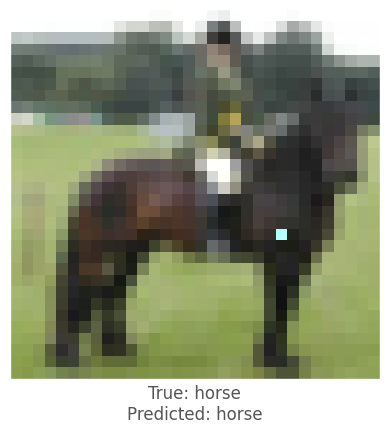


 resnet - image 8278 - 3 / 5


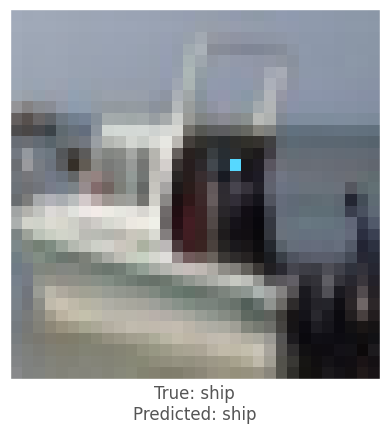


 resnet - image 528 - 4 / 5


c:\Users\victo\onePixelAttack\differential_evolution.py:146: RuntimeWarning: divide by zero encountered in scalar divide
  convergence=self.tol / convergence) is True):


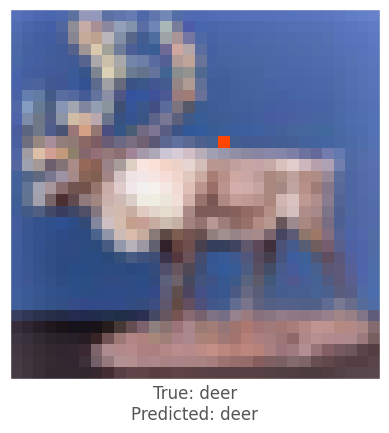


 resnet - image 9772 - 5 / 5


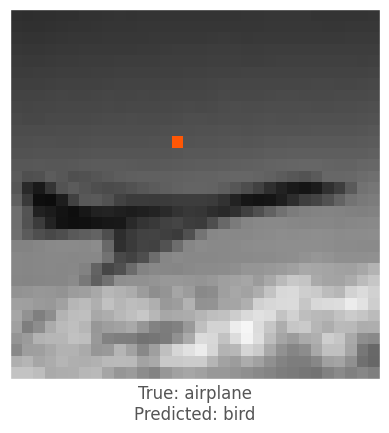

In [4]:
untargeted = attackHelper.attack_all(resnet,class_names,correct_imgs,x_test,y_test)

In [5]:
untargeted = helper.load_results()
columns = ['model', 'pixels', 'image', 'true', 'predicted', 'success', 'cdiff', 'prior_probs', 'predicted_probs', 'perturbation']
untargeted_results = pd.DataFrame(untargeted, columns=columns)

In [7]:
helper.attack_stats(untargeted_results, [resnet], network_stats)

[1]


,model,accuracy,pixels,attack_success_rate
0,resnet,0.9173,1,0.4
